# Dataset: https://github.com/thunlp/Chinese_Rumor_Dataset


# Step1 Preprocessing Dataset

1. Unzip all dataset files. Read and analyze the dataset. Generate all_data.txt

2. Generate data dictionary. Generate dict.txt 

3. Generate a data list and divide it into training and evaluation sets. Generate train_list.txt and eval_list.txt

4. Define a traing data feeder and a evaluation data feeder. Generate train_reader and eval_reader.

In [9]:
# unzip Rumor_Dataset.zip to the data directory
import zipfile
import os
import random
from PIL import Image
from PIL import ImageEnhance
import json

src_path="/home/aistudio/data/data20519/Rumor_Dataset.zip"
target_path="/home/aistudio/data/Chinese_Rumor_Dataset-master"
if(not os.path.isdir(target_path)):
    z = zipfile.ZipFile(src_path, 'r')
    z.extractall(path=target_path)
    z.close()

In [12]:
# file path of rumor data, non-rumor data, and all data
rumor_class_dirs = os.listdir(target_path+"/Chinese_Rumor_Dataset-master/CED_Dataset/rumor-repost/")
non_rumor_class_dirs = os.listdir(target_path+"/Chinese_Rumor_Dataset-master/CED_Dataset/non-rumor-repost/")
original_microblog = target_path+"/Chinese_Rumor_Dataset-master/CED_Dataset/original-microblog/"


# label of the rumor 0 and non-rumor 1
rumor_label="0"
non_rumor_label="1"

# count of the rumor and non-rumor
rumor_num = 0
non_rumor_num = 0

all_rumor_list = []
all_non_rumor_list = []

# get all rumor data
for rumor_class_dir in rumor_class_dirs: 
    if(rumor_class_dir != '.DS_Store'):
        with open(original_microblog + rumor_class_dir, 'r') as f:
	        rumor_content = f.read()
        rumor_dict = json.loads(rumor_content)
        all_rumor_list.append(rumor_label+"\t"+rumor_dict["text"]+"\n")
        rumor_num +=1


# get all non rumor data
for non_rumor_class_dir in non_rumor_class_dirs: 
    if(non_rumor_class_dir != '.DS_Store'):
        with open(original_microblog + non_rumor_class_dir, 'r') as f2:
	        non_rumor_content = f2.read()
        non_rumor_dict = json.loads(non_rumor_content)
        all_non_rumor_list.append(non_rumor_label+"\t"+non_rumor_dict["text"]+"\n")
        non_rumor_num +=1
        
print("Counting of rumor data: "+str(rumor_num))
print("Counting of non-rumor data: "+str(non_rumor_num))


Counting of rumor data: 1538
Counting of non-rumor data: 1849


In [14]:
for  i in range(10):
    print(all_rumor_list[i])

0	【交通新规】2013年1月1日施行:1闯红灯记6分，罚100元。2酒驾5年内不得再考取驾照。3不系安全带记3分，罚100元。4副驾不系安全带记1分，罚50元。5行驶中拨打手机记3分，罚100元。6行驶中抽烟记1分，罚100元。7有意遮挡号牌记12分，顶额处罚。8超速驾驶记6分。速度转发扩散给朋友啊！！! (via广州日报)

0	家乐福突发事件，营业时间所有出入口用铁门封闭，不许进出，原因是一女士结账时跟在身边的孩子突然失踪，报警后，家乐福立刻封闭所有出入口寻找，孩子后在二楼卫生间找到，头发被剃光，衣服被换掉，人口贩子不知去向，团伙作案手法迅速，年关将至，大家出入公共场合务必带好孩子。转发给周围的妈妈们。

0	转帖：Mico是中美混血男孩，3周岁，身高1米左右，偏瘦，寸头，离开时身穿绿色棉布大衣、深蓝色裤子、咖色皮鞋，能说简单的中文及英文。于1月7日16：33分左右，🌟在深圳爱绿双语幼儿园门口育秀路段（大润发周边）被抢走，至今下落未明，他的妈妈已近崩溃，望知情者提供线索，求扩散！

0	【交通新规】2013年1月1日施行:①闯红灯，记6分罚100元。②酒驾，5年内不得再考取驾照。③不系安全带，记3分罚100元。④副驾不系安全带，记1分罚50元。⑤行驶中拨打手机，记3分罚100元。⑥行驶中抽烟，记1分罚100元。⑦有意遮挡号牌，记12分顶额处罚。⑧超速驾驶，记6分◆北京全攻略 @北京玩乐攻略fun

0	新骗局来了：如果你收到任何一个电话（包括1008600）说在检查你的手机线路，并要求你按“#”或其他任何键，不要按键，并结束通话。那是一家欺诈公司，他们的机器能在你按键后连接到你的SIM卡，并用你的钱来打电话。记者了解到，很可能有人安装了类似号码修改器的软件。抓紧【转】走！☞@全球奇闻异趣

0	1996年在澳大利亚悉尼，一只野狗在水库大便，结果当地水务局鉴定水质污染，悉尼水业在电视台和报社打广告，告诉大家自来水被污染；2013年在中国上海，几千头死猪出现在黄浦江，结果当地水务局宣布水质没有问题...潘评：上海现在烧壶开水再加两片藕就是排骨汤，这生活多好啊！

0	【一只救了32条人命的搜救犬牺牲了】昨天下午一只军用搜救犬发现一位大爷，它就钻进里面，结果塌陷了，当战士们将其挖出的时候，发现军犬的内脏已经砸烂，这只狗狗在这几天已经发现了35名幸存者，有32名获救。

In [5]:
for i in range(10):
    print(all_non_rumor_list[i])

1	【纪念日】四年,一晃眼,或许你谈了一场刻骨铭心的恋爱,或许你收获了会陪伴一生的友谊,不管怎样,烙在心上的东西,忘不了,丢不掉,就像当初跨进百度李敏镐吧一样,怀着憧憬,带着一路或欢笑或荆棘走到现在,未来的五年六年…许多年,还要看到那么多怀着相同信念的姑娘一起欢笑.四周年,我们在这里--百度李敏镐吧

1	你思考问题的时候会咬嘴上的死皮吧、你睡觉会蜷成一团用被子把自己卷起来吧 、你害怕一个人的时侯看见别人成群结队吧、 你吃饭时搭车时总喜欢坐靠窗的位置吧 、你只会对人倾诉一部分事而把另一部分藏心里吧 、你讨厌有很多陌生人热闹嘈杂的地方吧 、那是缺乏安全感的表现，中枪了吗~ 安，好梦。

1	【奶粉之后，下一个限购会是尿不湿吗？】据中国新闻网，自上月实施限奶令，缓解了香港“奶粉荒”，但另一波“尿片荒”却已悄然而至。纸尿片已成水客扫货首选，多间药房均已售罄。另据钱江晚报，几天前，宁波海关打掉一个走私花王纸尿裤的公司。该公司共走私花王纸尿裤57万余包，够5万新生儿用半年。

1	【河北邢台市长遭网上联名举报】日前，标题为《曝河北省邢台市市长刘大群收受回扣、豢养情妇》的举报网帖，成为网络反腐最新一波。该文章以“张剑仁”等河北邢台29名干部群众身份，联名举报邢台市长刘大群“四宗罪”。许多网民表示，此次联名举报的事实详细，有关部门应尽快查清事实。@新华社中国网事

1	#NBA精彩gif# JR史密斯压哨绝杀，这也是他本赛季第二次上演绝杀！如果你是主教练，你认为现役球员中谁最有资格执行最后一投？

1	【重庆警界内部“黑打”调查】重庆打黑3年，共5600人次警察被处理，重庆警方已低调启动纠错程序。重庆市公安局政治部宣传处负责人近日称，市委市政府和公检法系统正在协调处理“平反”的事，会在合适时间公布方案。被处理警察的申诉中，多称曾遭刑讯逼供。目前已900多人获内部“平反”。详见长微博：

1	其实我到现在对壹基金也没太多不满，而且壹基金救援联盟里的事我还少少参与过，里面好多救援专家，相当牛逼。只是因为牛根生在里面做理事我才不敢信壹基金了。谁有能力把牛根生弄红会去好不好？这样大家相得益彰是不是啊？求大神。

1	#晚间分享#【积极生活的奥秘，你知道吗？】1.对于工作，我们努力但不痴狂；2.对于购物，我们量力而不攀比；3.对于娱乐，我们爱好但不丧志；4.对于家庭，我们忠诚但不刻板；5.

In [16]:
data_list_path="/home/aistudio/data/"
all_data_path=data_list_path + "all_data.txt"

all_data_list = all_rumor_list + all_non_rumor_list


# shuffle the data
random.shuffle(all_data_list)

with open(all_data_path, 'w') as f:
    f.seek(0)
    f.truncate() 
    
with open(all_data_path, 'a') as f:
    for data in all_data_list:
        f.write(data) 

In [18]:
import os
from multiprocessing import cpu_count
import numpy as np
import shutil
import paddle
import paddle.fluid as fluid
from PIL import Image
import matplotlib.pyplot as plt


In [21]:

# Generate data dict
def create_dict(data_path, dict_path):
    dict_set = set()
    # Read all data 
    with open(data_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    # Generate a set to remove duplicate
    for line in lines:
        content = line.split('\t')[-1].replace('\n', '')
        for s in content:
            dict_set.add(s)
    # transfer the set to dict
    dict_list = []
    i = 0
    for s in dict_set:
        dict_list.append([s, i])
        i += 1
    # add unknown token
    dict_txt = dict(dict_list)
    end_dict = {"<unk>": i}
    dict_txt.update(end_dict)
    # save them to the file
    with open(dict_path, 'w', encoding='utf-8') as f:
        f.write(str(dict_txt))
    print("Finish generation the data dict")
    
    
# get the length of the data dict
def get_dict_len(dict_path):
    with open(dict_path, 'r', encoding='utf-8') as f:
        line = eval(f.readlines()[0])
    return len(line.keys())


In [23]:
# the path to save the dictionary
dict_path = data_list_path + "dict.txt"

# create the data dict
with open(dict_path, 'w') as f:
    f.seek(0)
    f.truncate() 
create_dict(all_data_path, dict_path)

Finish generation the data dict


**Some example of the dictionary**

'置': 26, '插': 27, '拢': 28, '砍': 29, '沁': 30, '鄭': 31, '纸': 32, 'ら': 33, '缕': 34, '蒲': 35, '韩': 36, 'M': 37, '雯': 38, '囚': 39,

In [34]:
# 创建序列化表示的数据,并按照一定比例划分训练数据与验证数据
def create_data_list(data_list_path):
    # Empty the eval_list.txt and train_list,txt before generate new data
    with open(os.path.join(data_list_path, 'eval_list.txt'), 'w', encoding='utf-8') as f_eval:
        f_eval.seek(0)
        f_eval.truncate()
        
    with open(os.path.join(data_list_path, 'train_list.txt'), 'w', encoding='utf-8') as f_train:
        f_train.seek(0)
        f_train.truncate() 
    
    # Read in the whole data dict
    with open(os.path.join(data_list_path, 'dict.txt'), 'r', encoding='utf-8') as f_data:
        dict_txt = eval(f_data.readlines()[0])
    
    # Read in all datapoints we have
    with open(os.path.join(data_list_path, 'all_data.txt'), 'r', encoding='utf-8') as f_data:
        lines = f_data.readlines()
    
    
    i = 0
    # Split the dataset into train and evaluation set by random choosing 1/8 of them.
    # Use the dict just generated to transfer the regular sentence to a number string
    with open(os.path.join(data_list_path, 'eval_list.txt'), 'a', encoding='utf-8') as f_eval,open(os.path.join(data_list_path, 'train_list.txt'), 'a', encoding='utf-8') as f_train:
        for line in lines:
            words = line.split('\t')[-1].replace('\n', '')
            label = line.split('\t')[0]
            labs = ""


            if i % 8 == 0:
                for s in words:
                    lab = str(dict_txt[s])
                    labs = labs + lab + ','
                labs = labs[:-1]
                labs = labs + '\t' + label + '\n'
                f_eval.write(labs)
            else:
                for s in words:
                    lab = str(dict_txt[s])
                    labs = labs + lab + ','
                labs = labs[:-1]
                labs = labs + '\t' + label + '\n'
                f_train.write(labs)
            i += 1
        
    print("Finished the data list generation")

**NUMBER STRING**

2988,4404,2190,3144,2285,632,1525,1269,3717,3144,4288,2617,2049,2778,722,3162,1629,3672,3582,2229,3717,2402,2763,3481,1630,1068,1963,1416,2929,297,1236,2652,3219,2285,4288,1490,3435,223,3582,2229,3717,2402,2763,423,3162,2087,3864,3767,223,1812,1903,3162,1629,1014,4153,1616,1286,2520,1601,2852,423,3458,3917,4178,2274,2476,704,2190,3171,970,2027,4195,632,2763,4311,2745,1527,3469,3550,1525,2929,3582,2229,3717,2402,2763,3390,1311,3843,2053,3175,1269,3717,3390,1430,3219,423,395,1925,1141,446,1207,3390,1311,3092,768,2301,3466,1490,2787,4153,4311,986,4080,4080,3598,1564,2444,2444,4080,2976,3343,1901,2444,3741,2523,3109,2422,1749,3895,1682,3784,1963,2214,1525,223,3791,1655,1207,3997,994,4404,2638,2107,2027,3304,1055,1055

**ORIGINAL TEXTS**

【多地出新规：孩子出生超3月报户口需做亲子鉴定】近日网传“90天的新生儿若不做亲子鉴定，户籍部门不给上户口！”经调查显示，西安、银川等地确有相关规定。民警解释：“做亲子鉴定是为了证明孩子是你的，此政策主要是为防止贩卖儿童”。http://t.cn/8FIWzTH 网友：不知又要揭露多少真相啊……

In [35]:
dict_path = data_list_path + "dict.txt"

create_data_list(data_list_path)

Finished the data list generation


In [36]:
# Read the data point and string -> Number
def data_mapper(sample):
    data, label = sample
    data = [int(data) for data in data.split(',')]
    return data, int(label)

# define a data reader
def data_reader(data_path):
    def reader():
        with open(data_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                data, label = line.split('\t')
                yield data, label
    return paddle.reader.xmap_readers(data_mapper, reader, cpu_count(), 1024)

In [37]:
# Get training data generator and test data generator
BATCH_SIZE = 128

train_list_path = data_list_path+'train_list.txt'
eval_list_path = data_list_path+'eval_list.txt'

train_reader = paddle.batch(
		reader=data_reader(train_list_path), 
		batch_size=BATCH_SIZE)
eval_reader = paddle.batch(
		reader=data_reader(eval_list_path), 
		batch_size=BATCH_SIZE)

# Step2 Build up the LSTM

## 1 building up the model

In [38]:
# 定义长短期记忆网络
# define a LSTM network 
def lstm_net(ipt, input_dim):

    # IDs of data as input

    emb = fluid.layers.embedding(input=ipt, size=[input_dim, 128], is_sparse=True)

    # Fully Connected layer

    fc1 = fluid.layers.fc(input=emb, size=128)

    # use dynamic_lstm to generate a LSTM layer

    lstm1, _ = fluid.layers.dynamic_lstm(input=fc1, #Return the hidden state of LSTM 

                                         size=128) # Size  = 4 * hidden state

    # Max Pooling the FC layer

    fc2 = fluid.layers.sequence_pool(input=fc1, pool_type='max')

    # Max Pooling the LSTM layer

    lstm2 = fluid.layers.sequence_pool(input=lstm1, pool_type='max')

    # use the softmax as the output, Set size = 2 which will give the prediction of "rumor/non-rumor"

    out = fluid.layers.fc(input=[fc2, lstm2], size=2, act='softmax')

    return out

## 2 define the data layer

In [39]:
# define the input layer, lod_level = 1 defines that the input data is a stream 

words = fluid.data(name='words', shape=[None,1], dtype='int64', lod_level=1)
label = fluid.data(name='label', shape=[None,1], dtype='int64')


## 3 define the classifier 

In [40]:
# Get the length of the data dict
dict_dim = get_dict_len(dict_path)
# define the classifier
model = lstm_net(words, dict_dim)

## 4 Define the loss and the accuracy function 

Remember to generate the average of the loss function.


In [43]:
# Get the Loss and the accuracy
cost = fluid.layers.cross_entropy(input=model, label=label)
avg_cost = fluid.layers.mean(cost)
acc = fluid.layers.accuracy(input=model, label=label)


In [44]:
# Define the prediction
test_program = fluid.default_main_program().clone(for_test=True)

## 5 Define Optimizer

In [45]:
# define optimizer
optimizer = fluid.optimizer.AdagradOptimizer(learning_rate=0.001)
opt = optimizer.minimize(avg_cost)

Program: **fluid.default_startup_program()** and **fluid.default_main_program()** are configured.

The parameter initialization operation is written to **fluid.default_startup_program()**

fluid.default_main_program() is used to get the default or global main program (main program). All layer functions in fluid.layers can add operators and variables to the default_main_program. This is like pytorch's nn.sequential()

default_main_program is the default value for the Program parameter of many of fluid's programming interfaces (APIs). For example, Executor.run() will execute default_main_program by default when the user program is not passed in.

## Step 3 and 4 Train and evaluate 

### 1 Define a executor

In [46]:
# Use CPU to compute
use_cuda = False 
place = fluid.CUDAPlace(0) if use_cuda else fluid.CPUPlace()
exe = fluid.Executor(place)  
# Parameter initialization
exe.run(fluid.default_startup_program())


[]

### 2 Define a Data mapper

The DataFeeder is responsible for converting the data returned by the data providers (train_reader,test_reader) into a special data structure that can be entered into the Executor.

feed_list sets the name of the table of variables or variables to be fed into the model


In [47]:
# Define data feeder
feeder = fluid.DataFeeder(place=place, feed_list=[words, label])

### 3 Show the curve of training

In [48]:
all_train_iter=0
all_train_iters=[]
all_train_costs=[]
all_train_accs=[]

all_eval_iter=0
all_eval_iters=[]
all_eval_costs=[]
all_eval_accs=[]


def draw_process(title,iters,costs,accs,label_cost,lable_acc):
    plt.title(title, fontsize=24)
    plt.xlabel("iter", fontsize=20)
    plt.ylabel("cost/acc", fontsize=20)
    plt.plot(iters, costs,color='red',label=label_cost) 
    plt.plot(iters, accs,color='green',label=lable_acc) 
    plt.legend()
    plt.grid()
    plt.show()

### Train and save the model

Executor receives the program. According to the feed map and fetch_list, add feed and fetch operators to the program.

1. Feed map provides the input data for the program

2. Fetch_list return the variables user wanted

After each round of training, use the validation and compute the cost and acc

Pass:0, Batch:0, Cost:0.50863, Acc:0.88281
Test:0, Cost:0.51692, ACC:0.83750
Pass:1, Batch:0, Cost:0.49867, Acc:0.88281
Test:1, Cost:0.51228, ACC:0.83086
Pass:2, Batch:0, Cost:0.48922, Acc:0.89062
Test:2, Cost:0.49781, ACC:0.84375
Pass:3, Batch:0, Cost:0.47998, Acc:0.89062
Test:3, Cost:0.48998, ACC:0.84766
Pass:4, Batch:0, Cost:0.47146, Acc:0.89062
Test:4, Cost:0.48244, ACC:0.86172
Pass:5, Batch:0, Cost:0.46272, Acc:0.89844
Test:5, Cost:0.47475, ACC:0.86367
Pass:6, Batch:0, Cost:0.45472, Acc:0.89844
Test:6, Cost:0.46850, ACC:0.86797
Pass:7, Batch:0, Cost:0.44697, Acc:0.90625
Test:7, Cost:0.46020, ACC:0.86992
Pass:8, Batch:0, Cost:0.43955, Acc:0.90625
Test:8, Cost:0.45505, ACC:0.86797
Pass:9, Batch:0, Cost:0.43237, Acc:0.90625
Test:9, Cost:0.44876, ACC:0.86992
Model saved!


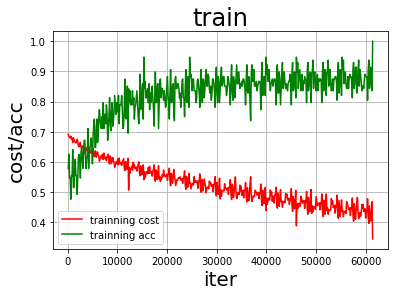

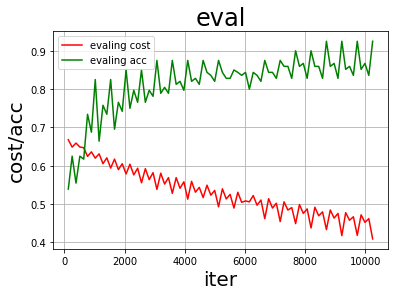

In [50]:
EPOCH_NUM=10                                        # Train Epoch
model_save_dir = '/home/aistudio/work/infer_model/' # Model saving 
# Start training 
for pass_id in range(EPOCH_NUM):
    # train code
    for batch_id, data in enumerate(train_reader()):
        train_cost, train_acc = exe.run(program=fluid.default_main_program(),
                             feed=feeder.feed(data),
                             fetch_list=[avg_cost, acc])
        all_train_iter=all_train_iter+BATCH_SIZE
        all_train_iters.append(all_train_iter)
        all_train_costs.append(train_cost[0])
        all_train_accs.append(train_acc[0])

        if batch_id % 100 == 0:
            print('Pass:%d, Batch:%d, Cost:%0.5f, Acc:%0.5f' % (pass_id, batch_id, train_cost[0], train_acc[0]))
    # validation code
    eval_costs = []
    eval_accs = []
    for batch_id, data in enumerate(eval_reader()):
        eval_cost, eval_acc = exe.run(program=test_program,
                                              feed=feeder.feed(data),
                                              fetch_list=[avg_cost, acc])
        eval_costs.append(eval_cost[0])
        eval_accs.append(eval_acc[0])
        
        all_eval_iter=all_eval_iter+BATCH_SIZE
        all_eval_iters.append(all_eval_iter)
        all_eval_costs.append(eval_cost[0])                                       
        all_eval_accs.append(eval_acc[0])      
    # calculate the average eval and train cost
    eval_cost = (sum(eval_costs) / len(eval_costs))
    eval_acc = (sum(eval_accs) / len(eval_accs))
    print('Test:%d, Cost:%0.5f, ACC:%0.5f' % (pass_id, eval_cost, eval_acc))

# save the model
if not os.path.exists(model_save_dir): 
    os.makedirs(model_save_dir) 
fluid.io.save_inference_model(model_save_dir, 
                            feeded_var_names=[words.name], 
                            target_vars=[model], 
                            executor=exe)
print('Model saved!') 

draw_process("train",all_train_iters,all_train_costs,all_train_accs,"trainning cost","trainning acc")
draw_process("eval",all_eval_iters,all_eval_costs,all_eval_accs,"evaling cost","evaling acc")

### Step 5 Prediction

In [51]:
# Use the model to predict
# executoer
place = fluid.CPUPlace()
infer_exe = fluid.Executor(place)
infer_exe.run(fluid.default_startup_program())

save_path = '/home/aistudio/work/infer_model/'


# get infer, data feeder and classifier from the model
[infer_program, feeded_var_names, target_var] = fluid.io.load_inference_model(dirname=save_path, executor=infer_exe)


# Fetch data
def get_data(sentence):
    # Data dict
    with open('/home/aistudio/data/dict.txt', 'r', encoding='utf-8') as f_data:
        dict_txt = eval(f_data.readlines()[0])
    dict_txt = dict(dict_txt)
    # Transfer the string to int
    keys = dict_txt.keys()
    data = []
    for s in sentence:
        # deal with unkown data
        if not s in keys:
            s = '<unk>'
        data.append(int(dict_txt[s]))
    return data


data = []
# get data 
data1 = get_data('兴仁县今天抢小孩没抢走，把孩子母亲捅了一刀，看见这车的注意了，真事，车牌号辽HFM055！！！！！赶紧散播！ 都别带孩子出去瞎转悠了 尤其别让老人自己带孩子出去 太危险了 注意了！！！！辽HFM055北京现代朗动，在各学校门口抢小孩！！！110已经 证实！！全市通缉！！')
data2 = get_data('重庆真实新闻:2016年6月1日在重庆梁平县袁驿镇发生一起抢儿童事件，做案人三个中年男人，在三中学校到镇街上的一条小路上，把小孩直接弄晕(儿童是袁驿新幼儿园中班的一名学生)，正准备带走时被家长及时发现用棒子赶走了做案人，故此获救！请各位同胞们以此引起非常重视，希望大家有爱心的人传递下')
data3 = get_data('@尾熊C 要提前预习育儿知识的话，建议看一些小巫写的书，嘻嘻')
data.append(data1)
data.append(data2)
data.append(data3)

# word number in every sentence
base_shape = [[len(c) for c in data]]

# generation of prediciton 
tensor_words = fluid.create_lod_tensor(data, base_shape, place)

# running
result = exe.run(program=infer_program,
                 feed={feeded_var_names[0]: tensor_words},
                 fetch_list=target_var)

# Labels
names = [ 'rumor', 'non-rumor']

# get the label with highest Probability
for i in range(len(data)):
    lab = np.argsort(result)[0][i][-1]
    print('the Result is %d， %s， the Probability is %f' % (lab, names[lab], result[0][i][lab]))

the Result is 0， rumor， the Probability is 0.709468
the Result is 0， rumor， the Probability is 0.648110
the Result is 1， non-rumor， the Probability is 0.621380
